# Introduction
Email spam, also referred to as junk email or simply spam, is unsolicited messages sent in bulk by email. 
Email spam has steadily grown since the early 1990s, and by 2014 was estimated to account for around 90% of total email traffic.Most email spam messages are commercial in nature. Whether commercial or not, many are not only annoying as a form of attention theft, but also dangerous because they may contain links that lead to phishing web sites or sites that are hosting malware or include malware as file attachments.
              That's why its necessary to filter spam messages/mails to protect user. 
               In this project we are going to use different classification algorithms to classify emails as spam or not spam. For that we have different features extracted from emails, these features include percentage of words, characters etc.



### Variables discription

In [3]:
import pandas as pd
names = pd.read_csv('/content/names.csv')
names.index = [x for x in range(1,58)]

In [4]:
names.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
Variables,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
type,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.,continuous.


* Here first 48 variables are percentage of the words in the email.
  
  100*(Number of times word appears in the email / Total number of words in the email)
  

* The second 6 variables are percentage of the symboles in the email.
  
  100*(Number of times character appears in the email / Total number of characters in the email)
  

* capital_run_length_average defines the average length uninterrupted sequence of the capital letters.

* capital_run_length_longest defines the length of longest uninterrupted sequence of the capital letters.

* capital_run_length_total is the sum of lengths of uninterrupted sequence of the capital letters.

* Class is the target variable [0: not spam,1: spam]

Columns are just the frequency of given words occured in the email and we predict the email is spam or not based on these columns

****Dataset source**** : http://www.ics.uci.edu/~mlearn/MLRepository.html

# Objective : 
  To predict the email is spam or not using different features extracted from the emails

Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# # getting columns names from names dataframe
# final_var = [Var.split('_')[-1][:-1] for Var in names.Variables[:48] ]
# final_var.extend([var[:-1] for var in names.Variables[48:]])
# final_var.append('Class')

In [67]:
#loading the dataset
df=pd.read_csv("/content/spam.csv")
df.columns = range(1,59)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [8]:
#cheaking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make                        4600 non-null   float64
 1   address                     4600 non-null   float64
 2   all                         4600 non-null   float64
 3   3d                          4600 non-null   float64
 4   our                         4600 non-null   float64
 5   over                        4600 non-null   float64
 6   remove                      4600 non-null   float64
 7   internet                    4600 non-null   float64
 8   order                       4600 non-null   float64
 9   mail                        4600 non-null   float64
 10  receive                     4600 non-null   float64
 11  will                        4600 non-null   float64
 12  people                      4600 non-null   float64
 13  report                      4600 

dtypes: float64(57), int64(1)

In [ ]:
# cheak shape of dataset
df.shape

(4601, 58)

Rows=214  ,   columns(features)=57

In [ ]:
# cheak null values
df.isna().sum().sum()

0

No null values present in the dataset

# EDA plots

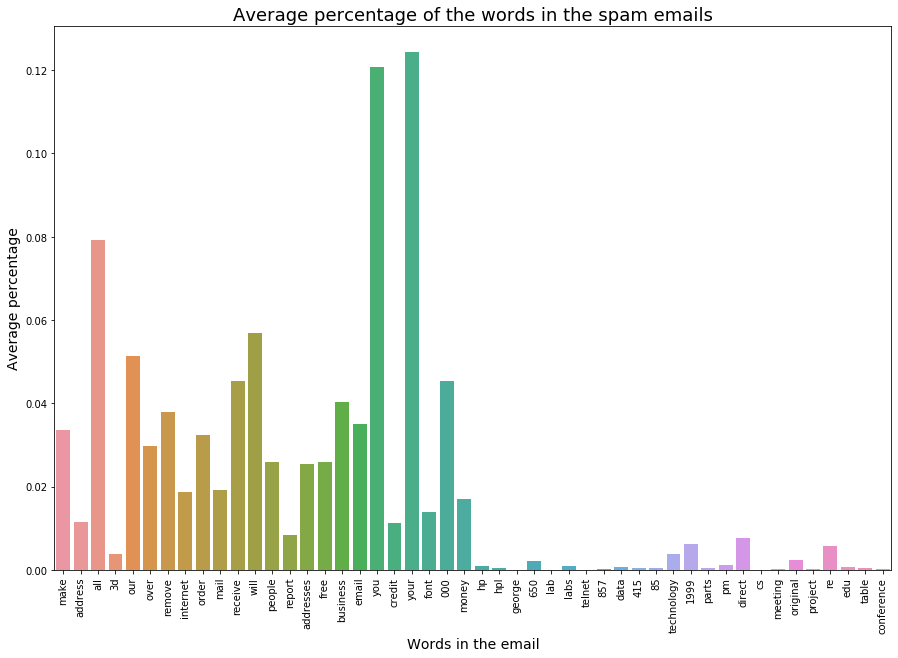

In [ ]:
data1 = df[df['Class']==1]
data = data1.loc[:,:'conference']
x = data.columns
y = [data[col].mean() for col in data.columns]
plt.figure(figsize = [15,10])
plt.title('Average percentage of the words in the spam emails',fontdict={'fontsize':18})
sns.barplot(x = x, y = y)
plt.xlabel('Words in the email',fontdict={'fontsize':14})
plt.ylabel('Average percentage',fontdict={'fontsize':14})
plt.xticks(rotation = 90)
plt.show()

### From above bar plot we can see that 'you' world used most of the time in the mail.

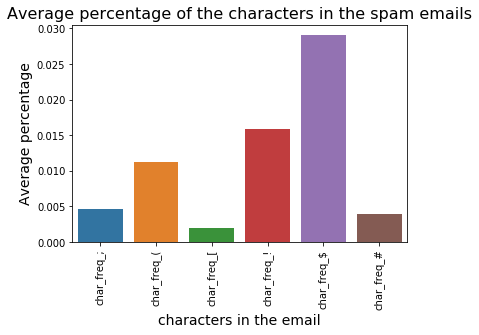

In [ ]:
data1 = df[df['Class']==1]
# plot for characters
data = data1.loc[:,'char_freq_;':'char_freq_#']
x = data.columns
y = [data[col].mean() for col in data.columns]
plt.title('Average percentage of the characters in the spam emails',fontdict={'fontsize':16})
sns.barplot(x = x, y = y)
plt.xlabel('characters in the email',fontdict={'fontsize':14})
plt.ylabel('Average percentage',fontdict={'fontsize':14})
plt.xticks(rotation = 90)

plt.show()

### form the above bar plot chatracter '!' used most of the time in the mail

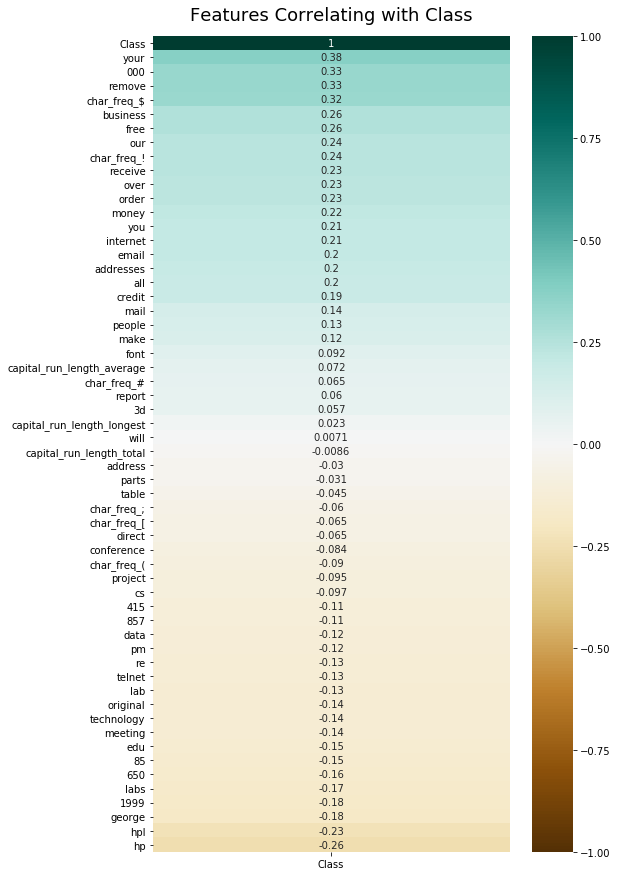

In [ ]:
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

### Here we can see that word "you" is highly correlated with class.

In [ ]:
df.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
       'char_freq_!', 'char_freq_$', 'char_freq_#',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'Class'],
      dtype='object')

In [ ]:
df["Class"].unique()

array([1., 0.])

In [ ]:
# describe the data
df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.023197,0.014910,0.055129,0.001529,0.031285,0.016313,0.015713,0.009480,0.017127,0.013172,...,0.008799,0.014271,0.004161,0.008308,0.012632,0.002231,0.004327,0.007297,0.043472,0.393913
std,0.068614,0.090385,0.099240,0.032593,0.067393,0.046573,0.053849,0.036104,0.052974,0.035468,...,0.055530,0.027732,0.026809,0.025175,0.040964,0.021655,0.038099,0.105952,1.292552,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000536,0.000501,0.002146,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006665,0.000000,0.000000,0.000000,0.000000,0.001159,0.001402,0.005934,0.000000
75%,0.000000,0.000000,0.082353,0.000000,0.039000,0.000000,0.000000,0.000000,0.000000,0.008801,...,0.000000,0.019278,0.000000,0.009699,0.008662,0.000000,0.002458,0.004205,0.016730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,5.000000,78.000000,1.000000


### column 56 and 57 need to be scaled as mean and variance of these columns is higher than other columns 

In [68]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[:-2] = mm.fit_transform(df[:-2])
df.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,0.080460,0.081696,0.117117,0.021,0.031746,0.0070,0.009804,0.030803,0.185067,0.000000,0.143114,0.0,0.078899,0.0344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01016,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
1,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,0.145594,0.046536,0.021622,0.000,0.396825,0.0030,0.008403,0.113311,0.072533,0.017602,0.045905,0.0,0.212844,0.0048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.012605,0.0,0.0,0.033613,0.0,0.002801,0.002721,0.0,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
2,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,0.032058,0.055856,0.000,0.000000,0.0155,0.000000,0.000000,0.169600,0.000000,0.027903,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0


In [10]:
df["Class"].value_counts()

0.0    2788
1.0    1812
Name: Class, dtype: int64

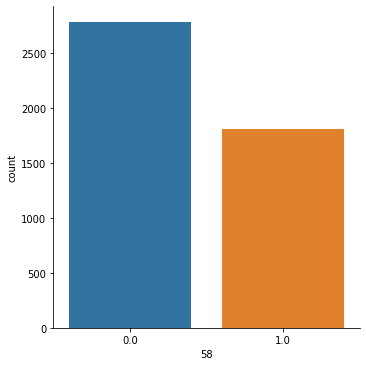

In [ ]:
sns.catplot(data=df,x="Class",kind="count")

### from the above plot both bars not having huge difference between two classes.

In [69]:
# asign the x and y
x=df.drop(columns=58)
y=df[58]

In [70]:
# split the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

### models

# 1) LogesticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.7869565217391304
[[381 182]
 [ 14 343]]
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80       563
         1.0       0.65      0.96      0.78       357

    accuracy                           0.79       920
   macro avg       0.81      0.82      0.79       920
weighted avg       0.84      0.79      0.79       920



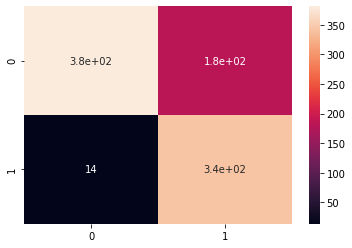

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))
sns.heatmap(cm,annot=True)

plt.show()

Here by Using Logistic Regression we got the accuracy 0.899022.
to get the better accuracy we go with 'Hyper Parameter Tunning'.

### hyper parameter tunning of logesticRegression

In [ ]:
#model 
import warnings
warnings.filterwarnings("ignore")
model=LogisticRegression()
#Parameters
penalty =['l1', 'l2', 'elasticnet']
C=[10,1,0.1,0.001,0.0001]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#grid 
grid=dict(solver=solver,C=C,penalty=penalty)
#cv 
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#Grid Search cv
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy",error_score=0)
result=gridcv.fit(x,y)
print(result.best_score_)
print(result.best_params_)

0.9243662171083656
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Here by Hyper Parameter Tunning we got the accuracy 0.924366 with the best parameter

### Retraining the logistic regression model on best parameters

In [72]:
model=LogisticRegression(C= 10, penalty= 'l1', solver='liblinear')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9510869565217391
[[534  29]
 [ 44 313]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       563
         1.0       0.92      0.88      0.90       357

    accuracy                           0.92       920
   macro avg       0.92      0.91      0.92       920
weighted avg       0.92      0.92      0.92       920



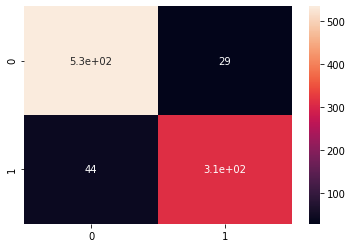

In [73]:
#Model Evaluation 
lr_pre,lr_recall,lr_fsc,support=score(ytest,ypred,average='macro')
lr_acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

Retraining the logistic regression model on best parameters Accuracy is : 0.8990228013029316

# 2)Naive Bayes classification

In [74]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
Gmodel.fit(xtrain,ytrain)
ypred=Gmodel.predict(xtest)

Accuracy is : 0.7869565217391304
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80       563
         1.0       0.65      0.96      0.78       357

    accuracy                           0.79       920
   macro avg       0.81      0.82      0.79       920
weighted avg       0.84      0.79      0.79       920



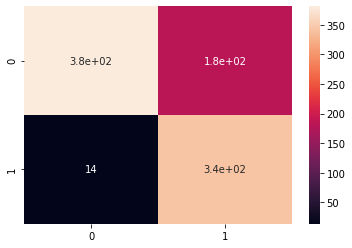

In [75]:
#Model Evaluation 
NB_pre,NB_recall,NB_fsc,support=score(ytest,ypred,average='macro')
NB_acc = accuracy_score(ytest,ypred)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

After the performing Naive Bayes classification we got the accuracy is 0.7926167209554832

# 3) Support Vector Machines

In [27]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.9207383279044516
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       564
         1.0       0.96      0.83      0.89       357

    accuracy                           0.92       921
   macro avg       0.93      0.90      0.91       921
weighted avg       0.92      0.92      0.92       921



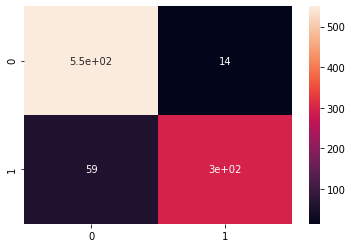

In [ ]:
#evalution
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

After Performing the Support Vector Machines algorithm Accuracy is:  0.9207383279044516

### hyper parameter tunning of SVM

In [ ]:
#model
model=SVC()
#parameters
kernel=['linear','poly','rbf','sigmoid']
C=[1,0.1,0.01,0.001]
gamma=['scale', 'auto']
#grid
grid=dict(kernel=kernel,C=C,gamma=gamma)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.9031702898550723


After the hyper parameter tunning of SVM we get best parameter 'C': 1, 'gamma': 'scale', 'kernel': 'rbf' with accuracy is 0.9031702898550723

### Retraining the SVM model on best parameters 

In [76]:
# For best parameter
from sklearn.svm import SVC
model=SVC(C= 1, gamma='scale', kernel='rbf')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.9043478260869565
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       563
         1.0       0.93      0.82      0.87       357

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.91      0.90      0.90       920



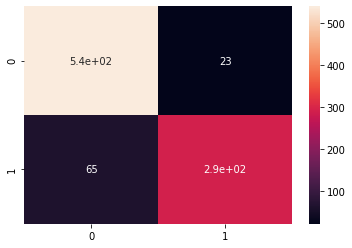

In [77]:
#Model Evaluation 
SVM_pre,SVM_recall,SVM_fsc,support=score(ytest,ypred,average='macro')
SVM_acc = accuracy_score(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

After the Retraining the logistic regression model on best parameters Accuracy is:  0.9207383279044516

# 4) KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.925
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       563
         1.0       0.94      0.86      0.90       357

    accuracy                           0.93       920
   macro avg       0.93      0.91      0.92       920
weighted avg       0.93      0.93      0.92       920



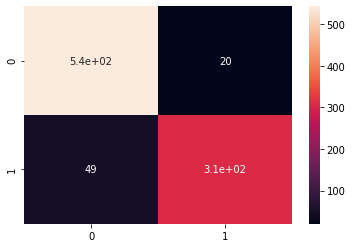

In [33]:
#Model Evaluation 
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

using the KNN algorithm Accuracy is:  0.8946796959826275

### hyper parameter tunning of KNN

In [78]:
#model 
model=KNeighborsClassifier()
#parameter grid
#1. n_neighbors 
#2.weights
#3.Metric
n_neighbors=range(1,31)
weights =['uniform', 'distance']
metric=["minkowski","euclidean","manhattan"]
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
0.9193840579710144


### Retraining the KNN model on best parameters

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.925
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       563
         1.0       0.94      0.86      0.90       357

    accuracy                           0.93       920
   macro avg       0.93      0.91      0.92       920
weighted avg       0.93      0.93      0.92       920



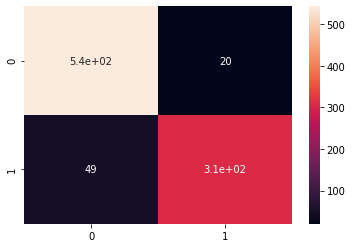

In [80]:
#Model Evaluation 
KNN_pre,KNN_recall,KNN_fsc,support=score(ytest,ypred,average='macro')
KNN_acc = accuracy_score(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

Retraining the logistic regression model on best parameters Accuracy is:  0.9163952225841476

# 5)Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.9174809989142236
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       564
         1.0       0.90      0.89      0.89       357

    accuracy                           0.92       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



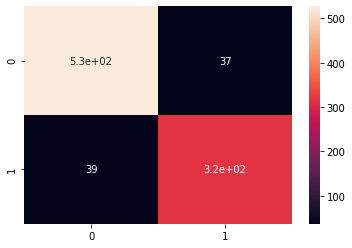

In [ ]:
# evaluation
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)


Using Decision Tree Algorithm Accuracy is:  0.9174809989142236

### hyper parameter tunning of DecisionTree

In [ ]:
#model
model=DecisionTreeClassifier()
criterion =["gini", "entropy"]
splitter =["best", "random"]
max_features = ["auto", "sqrt", "log2"]
max_depth=range(1,11)
#parameters
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

### Retraining the model on best parameter  

In [81]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', splitter='best')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.8804347826086957
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       563
         1.0       0.86      0.83      0.84       357

    accuracy                           0.88       920
   macro avg       0.88      0.87      0.87       920
weighted avg       0.88      0.88      0.88       920



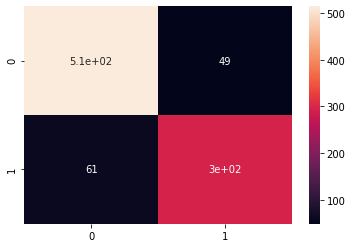

In [82]:
#Model Evaluation 
DT_pre,DT_recall,DT_fsc,support=score(ytest,ypred,average='macro')
DT_acc = accuracy_score(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

Retraining the model on best parameter Accuracy is:  0.8957654723127035

# 6) Ensemble Learning

## 1) Bagging Metaestimator

In [39]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy is : 0.9370249728555917
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       564
         1.0       0.94      0.90      0.92       357

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



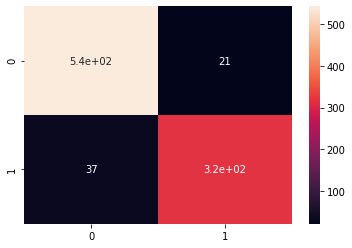

In [ ]:
#Model Evaluation 
print("accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

Using Bagging Metaestimator algorithm accuracy is : 0.9370249728555917

#### Hyper parameter tunning of metaestimator

In [ ]:
#model 
model=BaggingClassifier()
n_estimators =[10,50,100,1000]
#grid
grid=dict(n_estimators=n_estimators)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

#### Retraining the model on best parameters

In [104]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier( n_estimators= 1000)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy is : 0.9543478260869566
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       563
         1.0       0.95      0.93      0.94       357

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



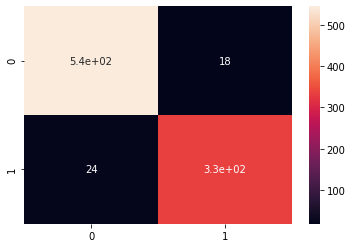

In [105]:
#Model Evaluation 
BM_pre,BM_recall,BM_fsc,support=score(ytest,ypred,average='macro')
BM_acc = accuracy_score(ytest,ypred)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Retraining the model on best parameters accuracy is  0.9467969598262758 

## ii) RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy is : 0.9609120521172638
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       564
         1.0       0.97      0.93      0.95       357

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



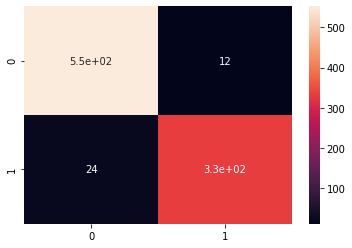

In [ ]:
#Model Evaluation 
print("accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)


Using Random Forest Algorithm Accuracy is 0.9609120521172638

### hyper parameter tuning of the random forest

In [ ]:
#model 
model=RandomForestClassifier()
n_estimators =[10,50,100,1000]
criterion =["gini", "entropy"]
max_features =["auto", "sqrt", "log2"]
#grid
grid=dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

best parameters are : {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
best accuracy is : 0.9520833333333332


By Hyper Parameter tunning of the random forest best Accuracy is best accuracy is : 0.9520833333333332 with best parameter are {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}

### Retraining the data on best parameters: 

In [102]:
model=RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=1000)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is:  0.9554347826086956
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       563
         1.0       0.96      0.92      0.94       357

    accuracy                           0.96       920
   macro avg       0.96      0.95      0.95       920
weighted avg       0.96      0.96      0.96       920



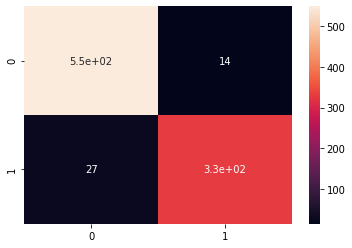

In [103]:
#evaluation
RF_pre,RF_recall,RF_fsc,support=score(ytest,ypred,average='macro')
RF_acc = accuracy_score(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print("Accuracy is: ",acc)
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

After Retraining the data on best parameters Accuracy is Accuracy is:  0.9598262757871878

# 7) Boosting

## i) Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9348534201954397
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       564
         1.0       0.91      0.92      0.92       357

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



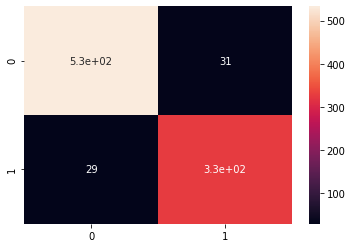

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Using Adaboost Algorithm Accuracy is : 0.9348534201954397

In [ ]:
#model 
model=AdaBoostClassifier()
n_estimators =[10,50,100,1000]
learning_rate =[0.1,1]
algorithm =["SAMME", "SAMME.R"]
#grid
grid=dict(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

### Retraining the Adaboost model on best parameters 

In [87]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(algorithm= 'SAMME.R',learning_rate=0.1, n_estimators= 1000)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9478260869565217
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       563
         1.0       0.94      0.93      0.93       357

    accuracy                           0.95       920
   macro avg       0.95      0.94      0.94       920
weighted avg       0.95      0.95      0.95       920



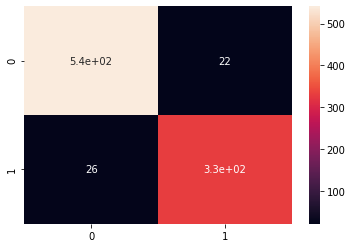

In [88]:
Ada_pre,Ada_recall,Ada_fsc,support=score(ytest,ypred,average='macro')
Ada_acc = accuracy_score(ytest,ypred)
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Retraining the logistic regression model on best parameters Accuracy is  0.9500542888165038

## ii) GradientBoost

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9445652173913044
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       563
         1.0       0.94      0.91      0.93       357

    accuracy                           0.94       920
   macro avg       0.94      0.94      0.94       920
weighted avg       0.94      0.94      0.94       920



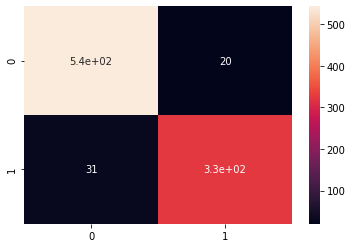

In [90]:
#Evaluation
GradBoost_pre,GradBoost_recall,GradBoost_fsc,support=score(ytest,ypred,average='macro')
GradBoost_acc = accuracy_score(ytest,ypred)
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After using the Gradient Boost Classifier algorithm Accuracy is 0.9511400651465798

## iii) XGBoost

In [91]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9445652173913044
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       563
         1.0       0.94      0.91      0.93       357

    accuracy                           0.94       920
   macro avg       0.94      0.94      0.94       920
weighted avg       0.94      0.94      0.94       920



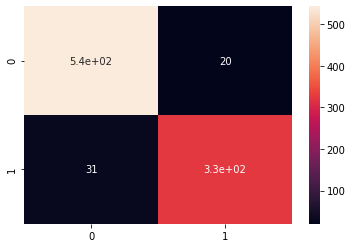

In [92]:
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Using the XGboost Classifier Algorithm Accuracy is  0.9457111834961998

In [ ]:
#model 
model=XGBClassifier()
n_estimators =[10,50,100]
learning_rate =[0.1,1]
#grid
grid=dict(n_estimators=n_estimators,learning_rate=learning_rate)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

### Retraining the XGBoost regression model on best parameters

In [93]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate= 1,n_estimators= 100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9456521739130435
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       563
         1.0       0.93      0.92      0.93       357

    accuracy                           0.95       920
   macro avg       0.94      0.94      0.94       920
weighted avg       0.95      0.95      0.95       920



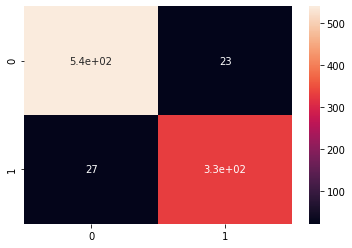

In [94]:
#Evaluation
XGB_pre,XGB_recall,XGB_fsc,support=score(ytest,ypred,average='macro')
XGB_acc = accuracy_score(ytest,ypred)
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Retraining the logistic regression model on best parameters Accuracy is 0.9565689467969598

# 7)Voting

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
models=[
    ("lr",LogisticRegression()),
    ("knn",KNeighborsClassifier(n_neighbors=5)),
    ("GNB",GaussianNB()),
    ("RF",RandomForestClassifier(n_estimators=50)),
    ('ABC',AdaBoostClassifier(n_estimators=50)),
    ('GBC',GradientBoostingClassifier(n_estimators=50)),
    ('SVM',SVC(C=0.1,probability=True))
]

In [96]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting="soft")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.95
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       563
           1       0.93      0.94      0.94       357

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



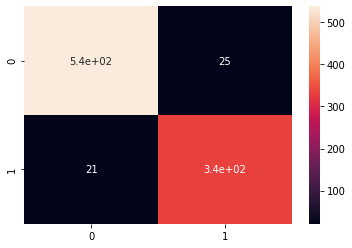

In [64]:
#Evaluation
voting_pre,voting_recall,voting_fsc,support=score(ytest,ypred,average='macro')
voting_acc = accuracy_score(ytest,ypred)
print("Accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

After Using the Voting Classifier Accuracy is 0.9511400651465798

# 8) Stacking 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Base models
base_models=[ ('knn',KNeighborsClassifier(n_neighbors=5)),
             ('svm',SVC(C=0.1,kernel='linear')),
             ('DT',DecisionTreeClassifier())
]
#Final Model
from sklearn.linear_model import LogisticRegression
final_model=LogisticRegression()
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is  0.9271739130434783
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       563
         1.0       0.92      0.89      0.90       357

    accuracy                           0.93       920
   macro avg       0.93      0.92      0.92       920
weighted avg       0.93      0.93      0.93       920



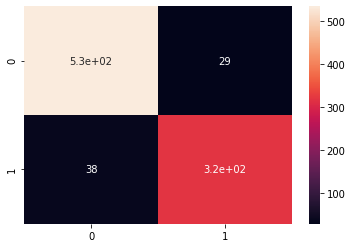

In [98]:
#Evaluation
stacking_pre,stacking_recall,stacking_fsc,support=score(ytest,ypred,average='macro')
stacking_acc = accuracy_score(ytest,ypred)
print("Accuracy is ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

After using Stacking Algorithm Accuracy is  0.9305103148751357

# Evaluation

In [106]:
models = ['Logistic Regression','Naive Bayes','SVM','KNN','Decision Tree','Bagging metaestimator','Random forest','AdaBoost','Gradient Boost','XGBoost','Voting classifier','stacking Classifier']
accuracy = [lr_acc,NB_acc,SVM_acc,KNN_acc,DT_acc,BM_acc,RF_acc,Ada_acc,GradBoost_acc,XGB_acc,voting_acc,stacking_acc]
precision=[lr_pre,NB_pre,SVM_pre,KNN_pre,DT_pre,BM_pre,RF_pre,Ada_pre,GradBoost_pre,XGB_pre,voting_pre,stacking_pre]
recall = [lr_recall,NB_recall,SVM_recall,KNN_recall,DT_recall,BM_recall,RF_recall,Ada_recall,GradBoost_recall,XGB_recall,voting_recall,stacking_recall]
fscore = [lr_fsc,NB_fsc,SVM_fsc,KNN_fsc,DT_fsc,BM_fsc,RF_fsc,Ada_fsc,GradBoost_fsc,XGB_fsc,voting_fsc,stacking_fsc]
Evaluation = pd.DataFrame({'No.':[x+1 for x in range(len(models))],'Model':models,'Accuracy':accuracy,'Precision':precision,'Recall':recall,'fscore':fscore})

In [107]:
Evaluation.style.highlight_max(subset = ['Accuracy'],color = 'lightgreen')

,No.,Model,Accuracy,Precision,Recall,fscore
0,1,Logistic Regression,0.920652,0.919540,0.912620,0.915793
1,2,Naive Bayes,0.786957,0.808945,0.818758,0.786592
2,3,SVM,0.904348,0.909773,0.888537,0.896853
3,4,KNN,0.925000,0.928127,0.913611,0.919765
4,5,Decision Tree,0.880435,0.875942,0.871049,0.873322
5,6,Bagging metaestimator,0.954348,0.953269,0.950401,0.951788
6,7,Random forest,0.955435,0.956214,0.949751,0.952758
7,8,AdaBoost,0.947826,0.945911,0.944047,0.944958
8,9,Gradient Boost,0.944565,0.944095,0.938821,0.941299
9,10,XGBoost,0.945652,0.943613,0.941759,0.942665


Text(0.5, 1.0, 'Evaluation of models')

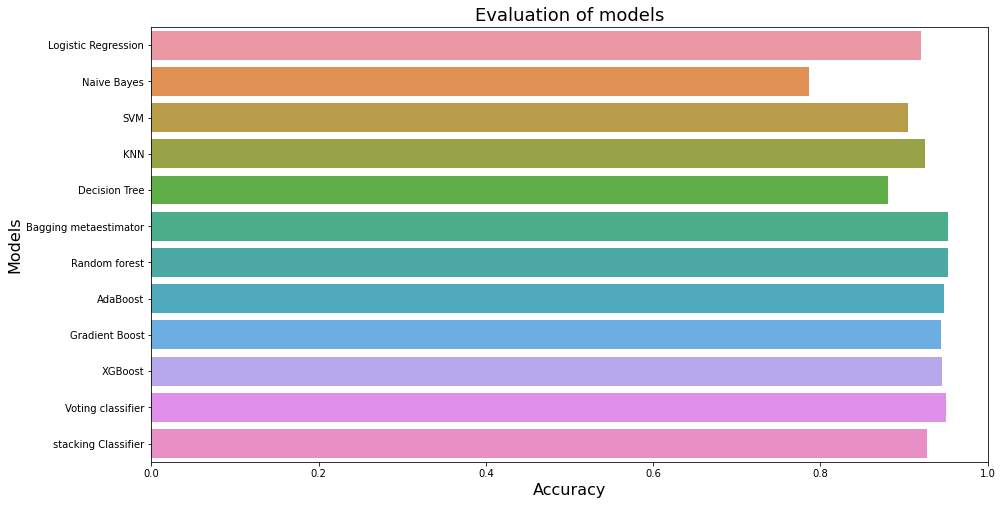

In [101]:
plt.figure(figsize = (15,8))
sns.barplot(x=accuracy, y=models)
plt.xlabel('Accuracy',fontdict={'fontsize':16})
plt.ylabel('Models',fontdict={'fontsize':16})
plt.title('Evaluation of models',fontdict={'fontsize':18})

### From the Above barplot it seems that Random Forest and Bagging are doing well on the data